## Import libraries

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np, os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data cleaning and transformation

In [10]:
os.chdir('/Users/annapenzo/Desktop/AGOSTO/COMPUTATIONAL SOCIAL SCIENCE/PROJECT/Fragile State Index')

In [11]:
df = pd.read_csv('fsi-2021.csv', delimiter = ";")
  
df.drop('Year', inplace=True, axis=1) #delete the "Year" column

df = df.replace(",",".", regex=True) #replace decimal commas with points
df.round(1) #to round the columns _tot in floats with 1 decimal

#transform data in columns from 3 to 15 into integers
df["C1: Security Apparatus"] = pd.to_numeric(df["C1: Security Apparatus"]) 
df["C2: Factionalized Elites"] = pd.to_numeric(df["C2: Factionalized Elites"])
df["C3: Group Grievance"] = pd.to_numeric(df["C3: Group Grievance"])

df["E1: Economy"] = pd.to_numeric(df["E1: Economy"])
df["E2: Economic Inequality"] = pd.to_numeric(df["E2: Economic Inequality"])
df["E3: Human Flight and Brain Drain"] = pd.to_numeric(df["E3: Human Flight and Brain Drain"])

df["P1: State Legitimacy"] = pd.to_numeric(df["P1: State Legitimacy"])
df["P2: Public Services"] = pd.to_numeric(df["P2: Public Services"])
df["P3: Human Rights"] = pd.to_numeric(df["P3: Human Rights"])

df["S1: Demographic Pressures"] = pd.to_numeric(df["S1: Demographic Pressures"])
df["S2: Refugees and IDPs"] = pd.to_numeric(df["S2: Refugees and IDPs"])
df["X1: External Intervention"] = pd.to_numeric(df["X1: External Intervention"])

In [12]:
df.shape
print(df)

                       Country   Rank  Total  C1: Security Apparatus  \
0                        Yemen    1st  111.7                     9.4   
1                      Somalia    2nd  110.9                     9.3   
2                        Syria    3rd  110.7                     9.6   
3                  South Sudan    4th  109.4                     9.7   
4    Congo Democratic Republic    5th  108.4                     8.6   
..                         ...    ...    ...                     ...   
174                    Denmark  175th   18.8                     1.7   
175                New Zealand  176th   18.4                     1.4   
176                    Iceland  177th   18.0                     0.7   
177                     Norway  178th   16.6                     1.8   
178                    Finland  179th   16.2                     2.5   

     C2: Factionalized Elites  C3: Group Grievance  E1: Economy  \
0                        10.0                  9.4          9.8   
1

In [13]:
# Dataset with indicators only
reduced_df = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14]]
reduced_df.shape
print(reduced_df)

     C1: Security Apparatus  C2: Factionalized Elites  C3: Group Grievance  \
0                       9.4                      10.0                  9.4   
1                       9.3                      10.0                  8.3   
2                       9.6                       9.9                  9.7   
3                       9.7                       9.2                  8.8   
4                       8.6                       9.5                  9.4   
..                      ...                       ...                  ...   
174                     1.7                       1.4                  3.7   
175                     1.4                       1.4                  2.6   
176                     0.7                       1.8                  0.5   
177                     1.8                       1.1                  3.3   
178                     2.5                       1.4                  0.6   

     E1: Economy  E2: Economic Inequality  E3: Human Flight and

## Exploratory analysis

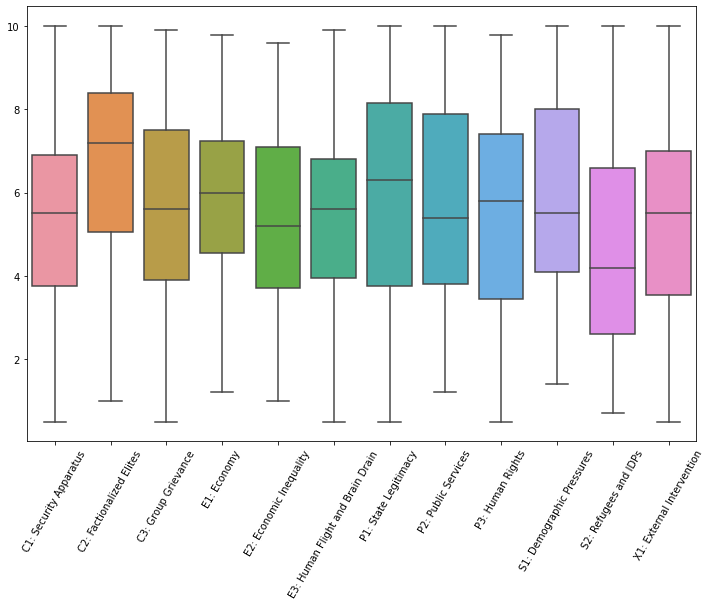

In [14]:
# Box plot
fig = plt.figure(figsize = (12,8))
boxpl = sns.boxplot(data=reduced_df)
boxpl.set_xticklabels(boxpl.get_xticklabels(), rotation=60)
plt.show()

In [15]:
# Countries with lowest values for "E3: Human Flight and Brain Drain" indicator
df_small_ind=df.nsmallest(10,'E3: Human Flight and Brain Drain')
df_small_ind

,Country,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
169,Australia,170th,21.8,2.7,1.7,3.1,1.6,1.8,0.5,0.5,2.8,1.7,2.9,2.0,0.5
171,Sweden,172nd,21.4,2.7,1.8,1.7,1.9,1.7,0.7,0.5,1.4,0.9,3.3,4.3,0.5
177,Norway,178th,16.6,1.8,1.1,3.3,1.9,1.0,0.8,0.5,1.6,0.5,1.4,2.2,0.5
170,Canada,171st,21.7,2.8,2.5,2.2,2.0,2.3,1.1,0.5,2.3,1.3,2.0,2.2,0.5
173,Switzerland,174th,19.9,1.6,1.0,2.7,2.0,1.8,1.1,0.5,1.6,0.8,3.2,3.1,0.5
141,Spain,142nd,44.8,3.4,6.9,6.7,5.3,2.9,1.2,6.9,2.9,1.2,3.5,2.2,1.7
174,Denmark,175th,18.8,1.7,1.4,3.7,1.7,1.2,1.3,0.5,1.4,0.9,2.3,2.2,0.5
144,Qatar,144th,44.1,1.4,5.0,3.4,1.6,4.7,1.5,6.4,2.9,6.1,3.4,1.4,6.3
178,Finland,179th,16.2,2.5,1.4,0.6,2.9,1.0,1.5,0.5,1.6,0.5,1.7,1.5,0.5
165,Austria,166th,26.1,1.6,3.2,3.9,1.8,2.3,1.6,0.6,2.3,0.5,3.4,4.4,0.5


In [16]:
# Countries with highest values for "E3: Human Flight and Brain Drain" indicator
df_large_ind=df.nlargest(10,'E3: Human Flight and Brain Drain')
df_large_ind

,Country,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention
109,Samoa,110th,64.2,3.8,5.1,4.5,6.5,3.7,9.9,4.3,4.8,3.6,5.2,2.9,9.9
80,Micronesia,81st,71.7,3.7,5.6,3.7,8.5,7.1,9.0,4.3,6.7,3.5,6.0,3.6,10.0
116,Jamaica,116th,61.2,6.6,3.7,2.2,6.9,4.7,9.0,3.6,7.2,5.2,4.6,2.8,4.7
1,Somalia,2nd,110.9,9.3,10.0,8.3,9.2,9.5,8.8,9.2,9.8,8.7,10.0,9.2,8.9
36,Palestine,37th,86.0,6.0,8.9,5.0,7.0,4.9,8.8,8.8,4.2,7.7,8.5,6.2,10.0
16,Eritrea,17th,97.0,6.2,8.4,8.3,7.7,8.3,8.6,9.6,8.3,8.9,8.2,7.4,7.1
81,El Salvador,82nd,71.6,6.6,4.8,5.5,6.1,5.4,8.4,4.4,6.8,5.5,7.0,5.5,5.6
118,Albania,119th,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1
2,Syria,3rd,110.7,9.6,9.9,9.7,9.6,7.1,8.2,10.0,9.6,9.7,7.6,9.7,10.0
105,Guyana,106th,66.1,7.1,5.1,6.5,4.5,4.7,8.2,4.6,6.4,3.3,5.8,3.4,6.5


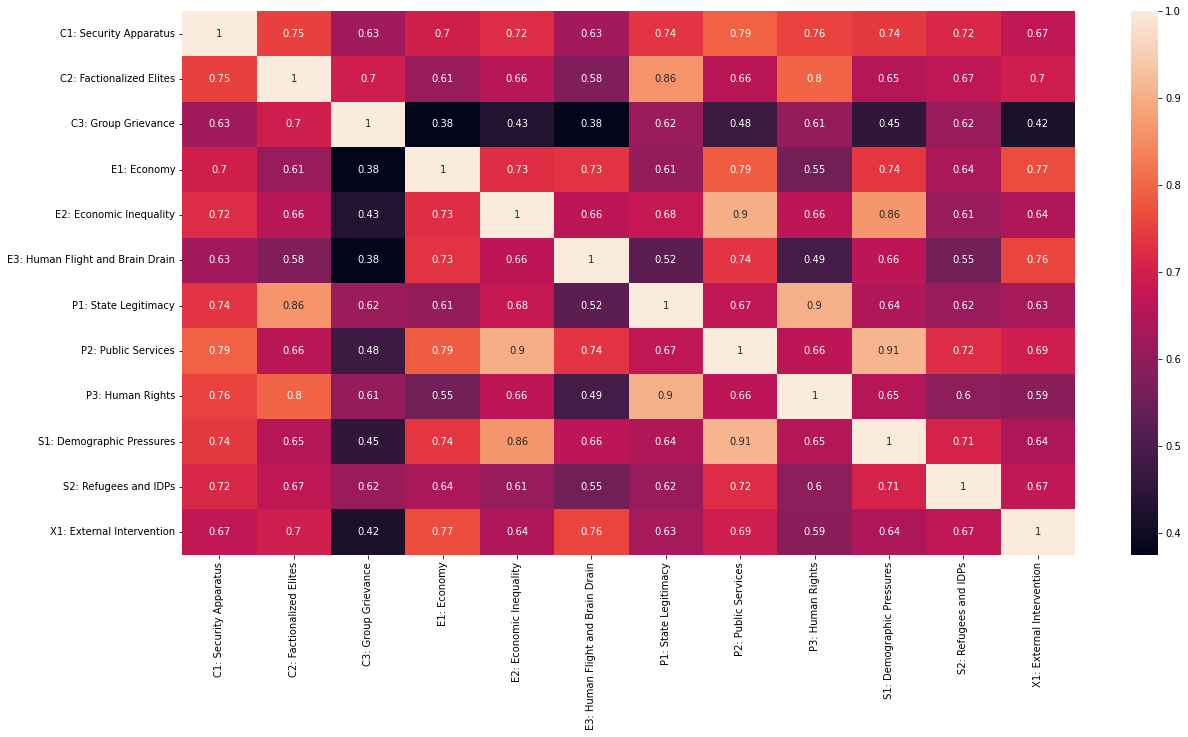

In [17]:
# Correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(reduced_df.corr(),annot = True)
plt.show()

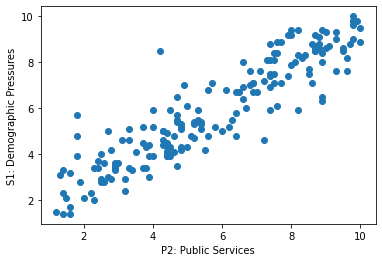

In [18]:
#Highest multicollinearity among variables
plt.scatter(df["P2: Public Services"], df["S1: Demographic Pressures"])
plt.xlabel("P2: Public Services")
plt.ylabel("S1: Demographic Pressures")
plt.show()

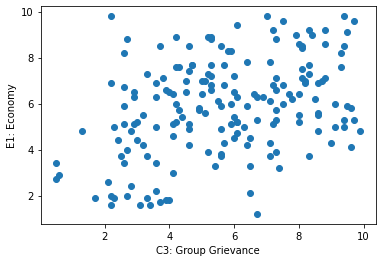

In [19]:
# Lowest multicollinearity among variables
plt.scatter(df["C3: Group Grievance"], df["E1: Economy"])
plt.xlabel("C3: Group Grievance")
plt.ylabel("E1: Economy")
plt.show()

## Principal Component Analysis 

In [20]:
# Standardisation
scaler = StandardScaler()
scaler.fit(reduced_df)

StandardScaler()

In [21]:
scaled_data = scaler.transform(reduced_df)

In [22]:
scaled_data

array([[ 1.81770188,  1.42994879,  1.62065892, ...,  1.75199296,
         2.13409537,  1.7537429 ],
       [ 1.77314914,  1.42994879,  1.14108612, ...,  1.84174875,
         1.88178159,  1.43665201],
       [ 1.90680735,  1.3881729 ,  1.7514515 , ...,  0.76467924,
         2.09204308,  1.87265198],
       ...,
       [-2.05838622, -1.99567359, -2.259521  , ..., -1.97287244,
        -1.35624533, -0.82262056],
       [-1.56830611, -2.28810477, -1.03879024, ..., -2.01775033,
        -1.06187925, -1.89280231],
       [-1.25643696, -2.16277712, -2.21592348, ..., -1.88311664,
        -1.35624533, -1.89280231]])

In [23]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [24]:
perc_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
print(perc_var)
labels = ["PC" + str(x) for x in range(1, len(perc_var) + 1)]

[69.4  9.4  4.9  4.5  2.8  2.1  1.9  1.5  1.3  1.   0.6  0.5]


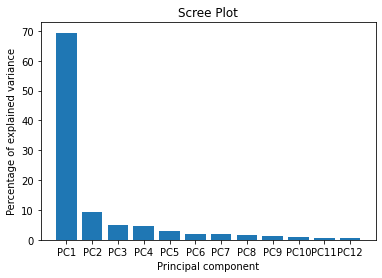

In [25]:
# Scree Plot
plt.bar(x = range(1, len(perc_var) + 1), height = perc_var, tick_label = labels)
plt.xlabel("Principal component")
plt.ylabel("Percentage of explained variance")
plt.title("Scree Plot")
plt.show()

In [26]:
# Table explainig how the indicators are loaded in the PCs
colnames = list(reduced_df.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,C1: Security Apparatus,-0.307273,-0.084611,-0.039449,-0.111198
1,C2: Factionalized Elites,-0.299109,-0.303139,0.112662,0.211300
2,C3: Group Grievance,-0.228743,-0.517805,0.265283,-0.451471
3,E1: Economy,-0.287103,0.320600,0.160244,0.096449
4,E2: Economic Inequality,-0.299411,0.208878,-0.423437,-0.040006
5,E3: Human Flight and Brain Drain,-0.267130,0.353855,0.364901,0.163949
6,P1: State Legitimacy,-0.294874,-0.324596,-0.147680,0.391920
7,P2: Public Services,-0.314940,0.237616,-0.262207,-0.189192
8,P3: Human Rights,-0.287387,-0.339799,-0.252829,0.337695
9,S1: Demographic Pressures,-0.302893,0.213710,-0.354146,-0.236473


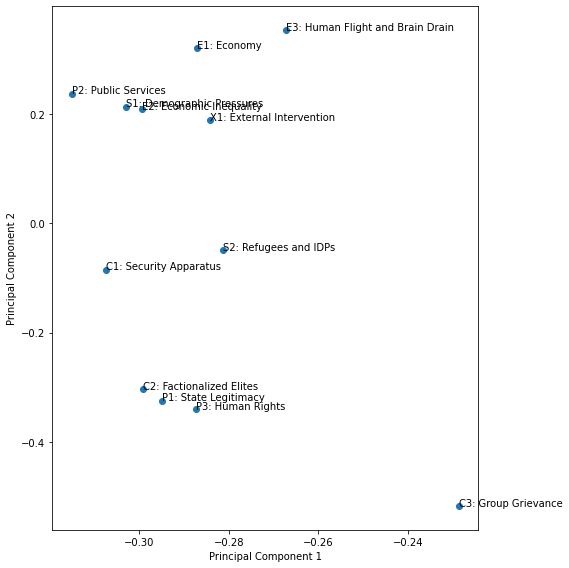

In [27]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [28]:
#PCA with 4 components
pca_final = PCA(n_components=4) 

In [29]:
# Original dimension
scaled_data.shape 

(179, 12)

In [30]:
# Reduced dimension
df_pca = pca_final.fit_transform(reduced_df)
df_pca.shape 

(179, 4)

In [31]:
# Solving multicollinearity issues
pc = np.transpose(df_pca)
corrmat = np.corrcoef(pc)

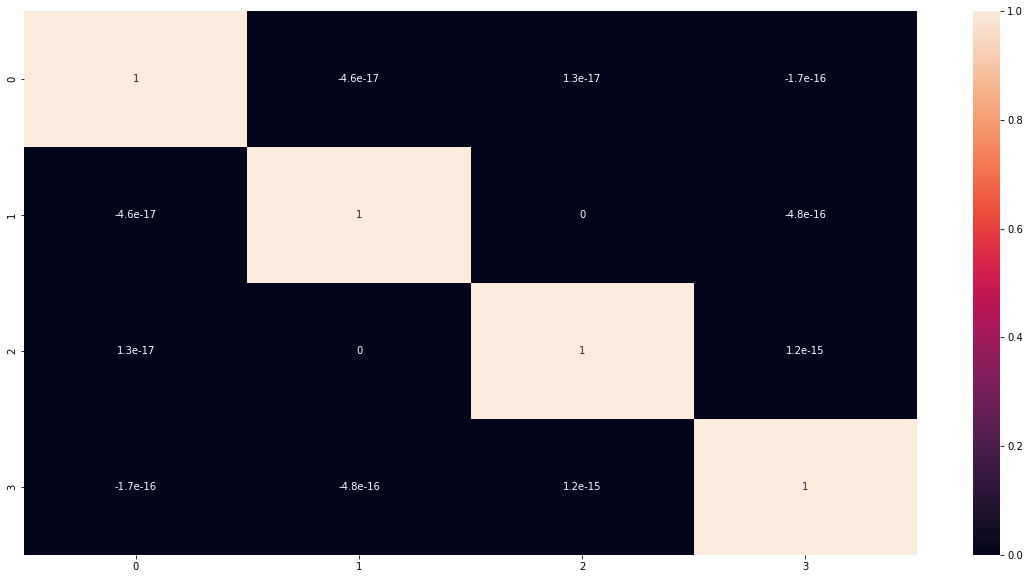

In [32]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [33]:
new_pca = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

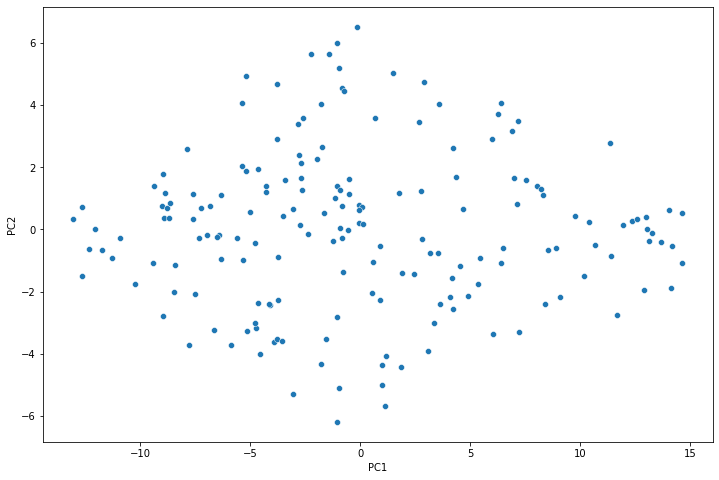

In [34]:
# Scatterplot in two-dimensional space
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=new_pca)
plt.show()

## Clustering 

In [35]:
new_clus = new_pca

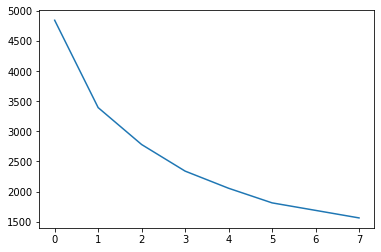

In [36]:
# Elbow curve
ssd = []
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(new_clus)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In [37]:
# K-Means
km_clust = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
km_clust.fit(new_clus)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [38]:
new_clus.index = pd.RangeIndex(len(new_clus.index))
df_clustering = pd.concat([new_clus, pd.Series(km_clust.labels_)], axis=1)
df_clustering.columns = ['PC1', 'PC2','PC3','PC4','Fragility']
df_clustering

,PC1,PC2,PC3,PC4,Fragility
0,-13.048997,0.336351,-1.542039,-0.581118,0
1,-12.653093,-1.486920,-0.670938,-0.835075,0
2,-12.679460,0.733977,-2.446290,0.847369,0
3,-12.357827,-0.641404,-1.265148,-1.366838,0
4,-12.046674,0.026365,-1.549610,-1.544942,0
...,...,...,...,...,...
174,14.023267,0.642071,-1.112367,-1.820797,1
175,14.181417,-0.533173,-0.323738,-0.868534,1
176,14.136909,-1.867973,-0.190652,1.886391,1
177,14.608122,0.542344,-1.161523,-1.604784,1


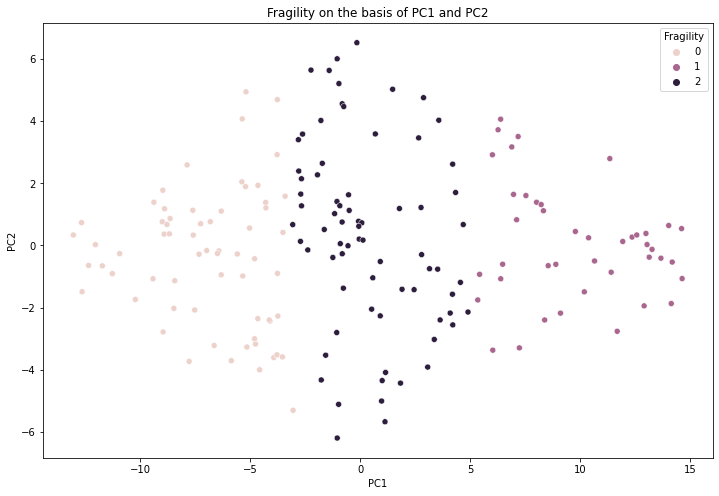

In [39]:
# Scatterplot in two-dimensional space with respect to fragility
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='Fragility',legend='full',data=df_clustering)
plt.title('Fragility on the basis of PC1 and PC2')
plt.show()

In [40]:
# Indicators grouped by fragility level
df_clustering_fragility = pd.merge(reduced_df, df_clustering["Fragility"], left_index=True,right_index=True)
df_by_fragility = df_clustering_fragility.groupby(['Fragility']).mean()
print(df_by_fragility)

           C1: Security Apparatus  C2: Factionalized Elites  \
Fragility                                                     
0                        7.278125                  8.496875   
1                        2.450000                  3.397619   
2                        5.254795                  6.723288   

           C3: Group Grievance  E1: Economy  E2: Economic Inequality  \
Fragility                                                              
0                     7.048438     7.557812                 7.331250   
1                     3.747619     3.366667                 2.685714   
2                     5.598630     5.821918                 5.031507   

           E3: Human Flight and Brain Drain  P1: State Legitimacy  \
Fragility                                                           
0                                  6.625000              7.992188   
1                                  2.733333              2.085714   
2                                  5.661644    

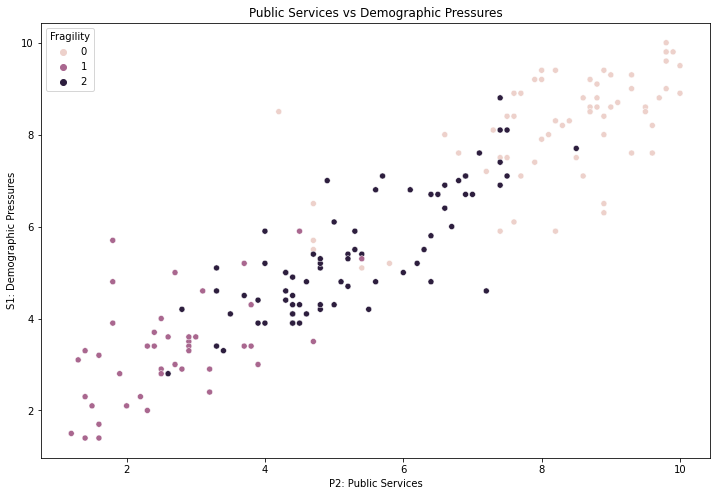

In [41]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='P2: Public Services',y='S1: Demographic Pressures',hue='Fragility',legend='full',data=df_clustering_fragility)
plt.xlabel('P2: Public Services', fontsize=10)
plt.ylabel('S1: Demographic Pressures', fontsize=10)
plt.title('Public Services vs Demographic Pressures')
plt.show()

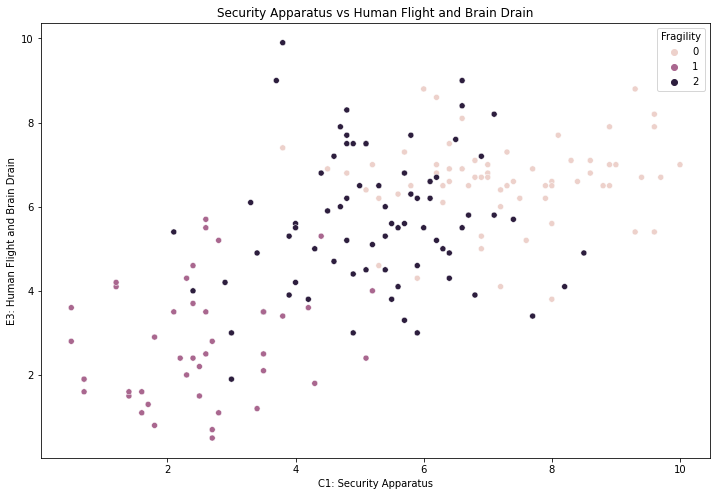

In [42]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='C1: Security Apparatus',y='E3: Human Flight and Brain Drain',hue='Fragility',legend='full',data=df_clustering_fragility)
plt.xlabel('C1: Security Apparatus', fontsize=10)
plt.ylabel('E3: Human Flight and Brain Drain', fontsize=10)
plt.title('Security Apparatus vs Human Flight and Brain Drain')
plt.show()